In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [14]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    discriminant: float
    equation: str
    result: str

In [ ]:
def show_equation(state: QuadState) -> QuadState:
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}


def calculate_discriminant(state: QuadState) -> QuadState:
    discriminant = state["b"] ** 2 - (4 * state["a"] * state["c"])
    return {"discriminant": discriminant}


def real_roots(state: QuadState) -> QuadState:
    print("Calculating real roots")
    root1 = (-state["b"] + state["discriminant"] ** 0.5) / (2 * state["a"])
    root2 = (-state["b"] - state["discriminant"] ** 0.5) / (2 * state["a"])
    result = f"Real roots: {root1} and {root2}"
    return {"result": result}


def repeated_roots(state: QuadState) -> QuadState:
    print("Calculating repeated root")
    root = (-state["b"]) / (2 * state["a"])
    result = f"Repeated root: {root}"
    return {"result": result}


def no_real_roots(state: QuadState) -> QuadState:
    print("No real roots")
    return {"result": "No real roots"}


def check_condition(
    state: QuadState,
) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [ ]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()

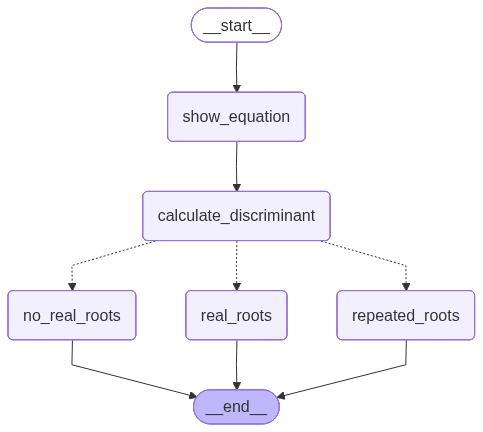

In [35]:
workflow

In [40]:
initial_state = {"a": 2, "b": 4, "c": 2}
final_resp = workflow.invoke(initial_state)

Calculating repeated root


In [41]:
final_resp

{'a': 2,
 'b': 4,
 'c': 2,
 'discriminant': 0,
 'equation': '2x^2 + 4x + 2 = 0',
 'result': 'Repeated root: -1.0'}